In [1]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [20]:
# Loading training dataset
dataset_train = pd.read_csv("trainset.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/2/2013,357.385559,361.151062,355.959839,359.288177,5115500
1,1/3/2013,360.122742,363.600128,358.031342,359.496826,4666500
2,1/4/2013,362.313507,368.339294,361.488861,366.600616,5562800
3,1/7/2013,365.348755,367.301056,362.929504,365.001007,3332900
4,1/8/2013,365.393463,365.771027,359.874359,364.280701,3373900


In [21]:
training_set = dataset_train.iloc[:, 1:2].values

print(training_set)
print(training_set.shape)

[[ 357.385559]
 [ 360.122742]
 [ 362.313507]
 ...
 [1057.390015]
 [1051.599976]
 [1046.719971]]
(1259, 1)


In [22]:
# normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [23]:
X_train = []
Y_train = []
for i in range(60, 1259):
    X_train.append(scaled_training_set[i-60:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(1199, 60)
(1199,)


In [24]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1199, 60, 1)

In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [27]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [28]:
# fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 19s 178ms/step - loss: 0.0362
Epoch 2/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0044
Epoch 3/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0038
Epoch 4/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0038
Epoch 5/100
38/38 [==============================] - 6s 171ms/step - loss: 0.0034
Epoch 6/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0038
Epoch 7/100
38/38 [==============================] - 8s 195ms/step - loss: 0.0038
Epoch 8/100
38/38 [==============================] - 7s 177ms/step - loss: 0.0035
Epoch 9/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0032
Epoch 10/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0031
Epoch 11/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0029
Epoch 12/100
38/38 [==============================] - 7s 197ms/step - loss: 0.0029
Epoch 13/100

In [30]:
dataset_test = pd.read_csv("testset.csv")
actual_stock_price = dataset_test.iloc[:, 1:2].values

In [34]:
# preparing input for the model
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 180):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [35]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

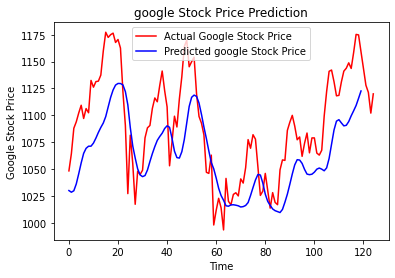

In [36]:
# plotting graphs

plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted google Stock Price')
plt.title('google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()